#### Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import re
import matplotlib.pyplot as plt

In [2]:
def load_adjlist_to_mtx(mtx_filename, nodes_filename):
    adj_mtx = np.loadtxt(mtx_filename, dtype=int)
    with open(nodes_filename, 'r') as f:
        nodes = [line.strip() for line in f.readlines()]
    return adj_mtx, nodes

adj_mtx2_dengue, nodes2_dengue = load_adjlist_to_mtx('output/grafo2_dengue_mtx.txt', 'output/grafo2_dengue_nodes.txt')
adj_mtx3_dengue, nodes3_dengue = load_adjlist_to_mtx('output/grafo3_dengue_mtx.txt', 'output/grafo3_dengue_nodes.txt')
adj_mtx1_mob, nodes1_mob = load_adjlist_to_mtx('output/grafo1_mob_mtx.txt', 'output/grafo1_mob_nodes.txt')
adj_mtx2_mob, nodes2_mob = load_adjlist_to_mtx('output/grafo2_mob_mtx.txt', 'output/grafo2_mob_nodes.txt')
adj_mtx3_mob, nodes3_mob = load_adjlist_to_mtx('output/grafo3_mob_mtx.txt', 'output/grafo3_mob_nodes.txt')

adj_dengue = [adj_mtx2_dengue, adj_mtx3_dengue]
adj_mob = [adj_mtx1_mob, adj_mtx2_mob, adj_mtx3_mob]

In [3]:
if nodes2_dengue!=nodes1_mob:
    raise ValueError('The graphs do not have the same set of nodes.')

In [4]:
def compare_adjacency_matrices_frobenius(matrix1, matrix2):
    if matrix1.shape != matrix2.shape:
        raise ValueError("Matrices have different shapes")
    
    frobenius_norm = np.linalg.norm(matrix1 - matrix2, ord='fro')
    return frobenius_norm

i = 1
j = 1
for dengue_mtx in adj_dengue:
    for mob_mtx in adj_mob:

        frob = compare_adjacency_matrices_frobenius(mob_mtx, dengue_mtx)
        print(f'Grafo dengue {i} - Grafo mob {j} - diff: {frob}')
        j+=1
    i+=1
    j=1

Grafo dengue 1 - Grafo mob 1 - diff: 39.774363602702685
Grafo dengue 1 - Grafo mob 2 - diff: 12.806248474865697
Grafo dengue 1 - Grafo mob 3 - diff: 9.38083151964686
Grafo dengue 2 - Grafo mob 1 - diff: 39.87480407475377
Grafo dengue 2 - Grafo mob 2 - diff: 12.489995996796797
Grafo dengue 2 - Grafo mob 3 - diff: 8.94427190999916


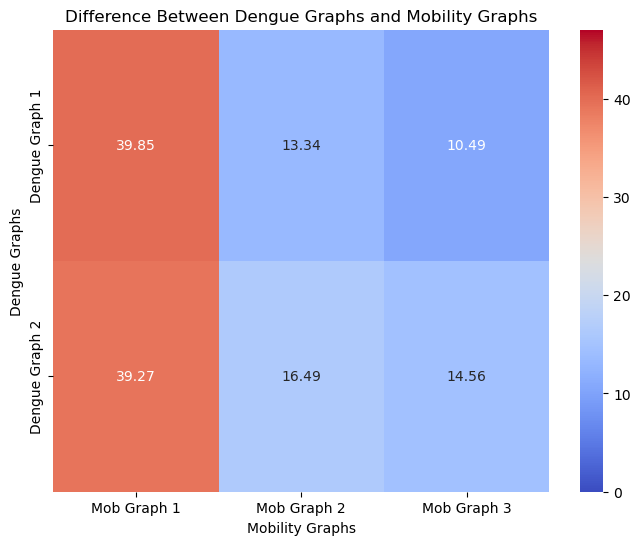

In [5]:
# Provided data
data = [
    [39.84971769034255, 13.341664064126334, 10.488088481701515],
    [39.26830783214372, 16.492422502470642, 14.560219778561036]
]

# Row and column names
x_labels = ['Mob Graph 1', 'Mob Graph 2', 'Mob Graph 3']
y_labels = ['Dengue Graph 1', 'Dengue Graph 2']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=47, xticklabels=x_labels, yticklabels=y_labels)

# Title and labels
plt.title("Difference Between Dengue Graphs and Mobility Graphs")
plt.xlabel("Mobility Graphs")
plt.ylabel("Dengue Graphs")

# Show the plot
plt.show()


In [6]:
# Function to extract the number from the filename
def extract_number(filename):
    match = re.search(r'threshold_(\d+)', filename)
    return int(match.group(1)) if match else float('inf')

# Function to extract the number from the filename as a float
def extract_float(filename):
    match = re.search(r'threshold_(\d+\.\d+)', filename)
    return float(match.group(1)) if match else float('inf')

# File pattern
mob_file_pattern = 'output/mtx_mob/'+'filtered_adj_matrix_threshold_*.txt'
mob_filtered_files = glob.glob(mob_file_pattern)
# Sort files based on the extracted number
mob_filtered_files.sort(key=extract_number)
# Display sorted files
# mob_filtered_files

# Generate the list of files matching the pattern
file_pattern = 'output/mtx_dengue/'+'filtered_adj_matrix_threshold_0*.txt'
filtered_files = glob.glob(file_pattern)
filtered_files.sort(key=extract_float)
# filtered_files = filtered_files[:-8] # Removing the last file that contains only zeros
# filtered_files

# Function to compare two matrices using the Frobenius norm
def compare_adjacency_matrices_frobenius(matrix1, matrix2):
    if matrix1.shape != matrix2.shape:
        raise ValueError("Matrices have different shapes")
    # Frobenius norm: sqrt(sum of squared differences)
    frobenius_norm = np.linalg.norm(matrix1 - matrix2, ord='fro')
    return frobenius_norm

triples = []
mob_idx = np.arange(0, 22050, 10)
dengue_idx = np.arange(0, 1, 0.02)

count_mob = 0
count_cases = 0

# Iterate over the files
for comparison_file in mob_filtered_files:
    i = mob_idx[count_mob]
    comparison_matrix = np.loadtxt(comparison_file, dtype=int)
    if not np.any(comparison_matrix):  # Check if the comparison matrix contains only zeros
        print(f'Comparison matrix {comparison_file} contains only zeros. Skipping...')
        count_mob += 1
        continue
    for cases_filtered_file in filtered_files:
        j = dengue_idx[count_cases]
        filtered_matrix = np.loadtxt(cases_filtered_file, dtype=int)
        if not np.any(filtered_matrix):  # Check if the filtered matrix contains only zeros
            # print(f'Filtered matrix {cases_filtered_file} contains only zeros. Skipping...')
            count_cases += 1
            continue
        differences = compare_adjacency_matrices_frobenius(filtered_matrix, comparison_matrix)
        # if differences > 1:
        #     print('something is wrong')
        triples.append((i, j, differences))
        count_cases += 1
    count_mob += 1
    count_cases = 0

triples


[(0, 0.0, 22.891046284519195),
 (0, 0.02, 22.80350850198276),
 (0, 0.04, 22.847319317591726),
 (0, 0.06, 22.847319317591726),
 (0, 0.08, 22.891046284519195),
 (0, 0.1, 22.627416997969522),
 (0, 0.12, 22.759613353482084),
 (0, 0.14, 22.67156809750927),
 (0, 0.16, 22.360679774997898),
 (0, 0.18, 23.021728866442675),
 (0, 0.2, 23.323807579381203),
 (0, 0.22, 23.790754506740637),
 (0, 0.24, 24.331050121192877),
 (0, 0.26, 24.61706725018234),
 (0, 0.28, 25.059928172283335),
 (0, 0.3, 25.573423705088842),
 (0, 0.32, 25.84569596664017),
 (0, 0.34, 26.68332812825267),
 (0, 0.36, 26.90724809414742),
 (0, 0.38, 27.568097504180443),
 (0, 0.4, 28.0),
 (0, 0.42, 28.635642126552707),
 (0, 0.44, 28.982753492378876),
 (0, 0.46, 29.597297173897484),
 (0, 0.48, 30.364452901377952),
 (0, 0.5, 30.822070014844883),
 (0, 0.52, 31.336879231984796),
 (0, 0.54, 32.12475680841802),
 (0, 0.56, 33.04542328371661),
 (0, 0.58, 33.76388603226827),
 (0, 0.6, 34.438350715445125),
 (0, 0.62, 35.270384177096794),
 (0, 0

In [7]:
len(triples)

101430

In [8]:
# Get all unique values of the first element from the triples
unique_first_elements = set(triple[0] for triple in triples)
unique_first_elements

filtered_triples = []

# Iterate over each unique value of the first element
for value in unique_first_elements:
    
    filtered_list = []
    for triple in triples: 
        if triple[0] == value:
            filtered_list.append(triple)
    min_triple = (0,0,10000)
    for triple in filtered_list:
        if(triple[2] < min_triple[2]):
            min_triple = triple
    filtered_triples.append(min_triple)

filtered_triples

[(0, 0.16, 22.360679774997898),
 (16390, 0.9, 2.8284271247461903),
 (8200, 0.9, 5.0990195135927845),
 (10, 0.16, 22.22611077089287),
 (16400, 0.9, 2.8284271247461903),
 (8210, 0.9, 5.0990195135927845),
 (20, 0.16, 22.271057451320086),
 (16410, 0.9, 2.8284271247461903),
 (8220, 0.9, 5.0990195135927845),
 (30, 0.16, 22.181073012818835),
 (16420, 0.9, 2.8284271247461903),
 (8230, 0.9, 5.0990195135927845),
 (40, 0.16, 22.715633383201094),
 (16430, 0.9, 2.8284271247461903),
 (8240, 0.9, 5.0990195135927845),
 (50, 0.16, 23.664319132398465),
 (16440, 0.9, 2.8284271247461903),
 (8250, 0.9, 5.0990195135927845),
 (60, 0.22, 23.790754506740637),
 (16450, 0.9, 2.8284271247461903),
 (8260, 0.9, 5.0990195135927845),
 (70, 0.22, 24.289915602982237),
 (16460, 0.9, 2.8284271247461903),
 (8270, 0.9, 5.0990195135927845),
 (80, 0.22, 24.899799195977465),
 (16470, 0.9, 2.8284271247461903),
 (8280, 0.9, 5.0990195135927845),
 (90, 0.28, 25.219040425836983),
 (16480, 0.9, 2.8284271247461903),
 (8290, 0.9, 5.0

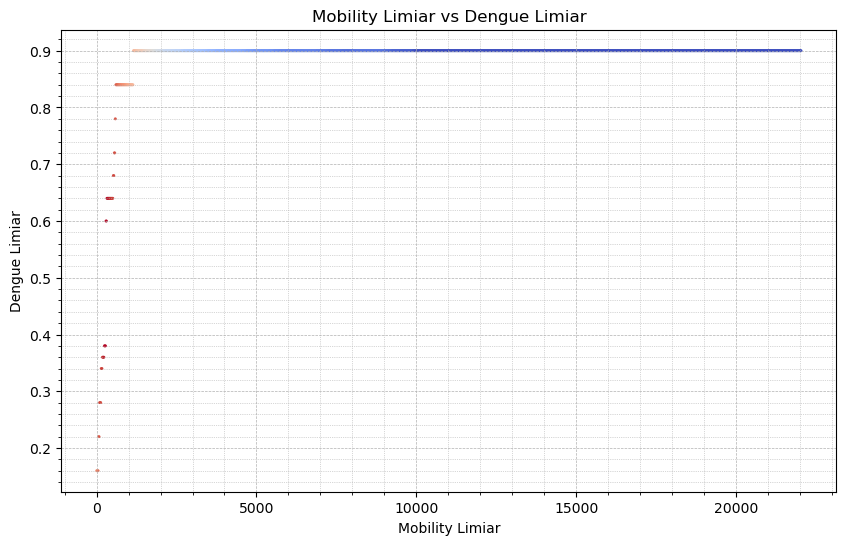

In [9]:
x_values = [triple[0] for triple in filtered_triples]
y_values = [triple[1] for triple in filtered_triples]
color_values = [triple[2] for triple in filtered_triples]

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=color_values, cmap='coolwarm', alpha=0.7, s=1)
plt.xlabel('Mobility Limiar')
plt.ylabel('Dengue Limiar')

plt.title('Mobility Limiar vs Dengue Limiar')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()  
plt.grid(True, which='minor', linestyle=':', linewidth=0.5) 

plt.show()

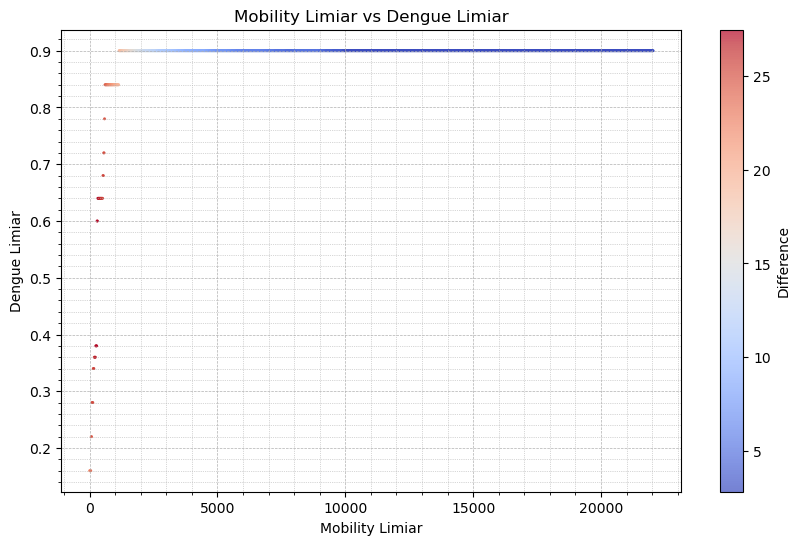

In [10]:
x_values = [triple[0] for triple in filtered_triples]
y_values = [triple[1] for triple in filtered_triples]
color_values = [triple[2] for triple in filtered_triples]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, c=color_values, cmap='coolwarm', alpha=0.7, s=1)

cbar = plt.colorbar(scatter)
cbar.set_label('Difference')

plt.xlabel('Mobility Limiar')
plt.ylabel('Dengue Limiar')
plt.title('Mobility Limiar vs Dengue Limiar')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
plt.show()

#### Log-Log Scale

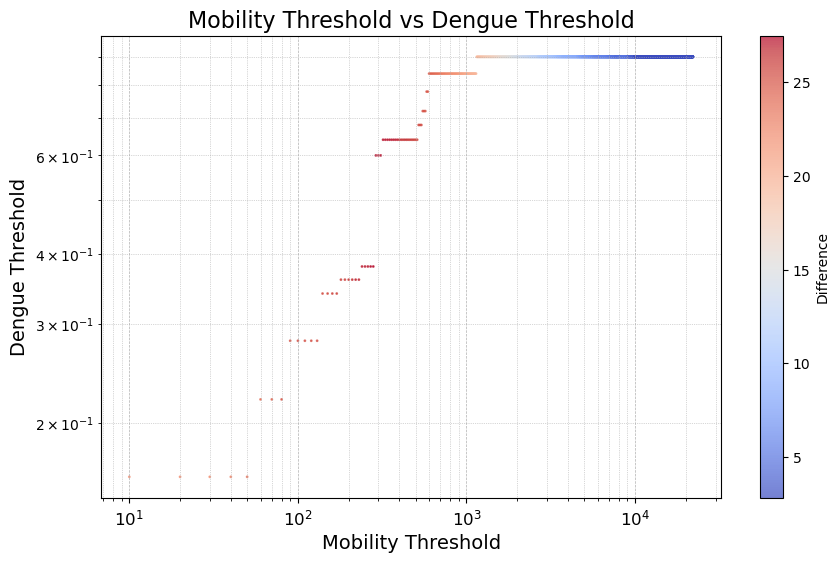

In [11]:
# Separating values for plotting
x_values = [triple[0] for triple in filtered_triples]
y_values = [triple[1] for triple in filtered_triples]
color_values = [triple[2] for triple in filtered_triples]

# Creating the plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, c=color_values, cmap='coolwarm', alpha=0.7, s=1)

# Adding the color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Difference')

# Axis titles with adjusted font size
plt.xlabel('Mobility Threshold', fontsize=14)
plt.ylabel('Dengue Threshold', fontsize=14)

# Plot title with adjusted font size
plt.title('Mobility Threshold vs Dengue Threshold', fontsize=16)

# Configuring the grid with adjusted font size for ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()  # Enables minor ticks
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)  # Style for minor ticks

# Adjusting tick font size
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)

# Setting log scale
plt.xscale('log')
plt.yscale('log')

# Displaying the plot
plt.show()


### Invertendo a busca, primeiro for pelo dengue limiar

In [12]:
unique_first_elements = set(triple[1] for triple in triples)
unique_first_elements
filtered_triples = []

for value in unique_first_elements:
    filtered_list = []
    for triple in triples: 
        if triple[1] == value:
            filtered_list.append(triple)
    min_triple = (0,0,10000)
    for triple in filtered_list:
        if(triple[2] < min_triple[2]):
            min_triple = triple
    filtered_triples.append(min_triple)

filtered_triples

[(0, 0.0, 22.891046284519195),
 (0, 0.06, 22.847319317591726),
 (10, 0.12, 22.715633383201094),
 (10, 0.14, 22.627416997969522),
 (30, 0.18, 22.67156809750927),
 (30, 0.2, 22.891046284519195),
 (40, 0.36, 25.059928172283335),
 (40, 0.3, 24.289915602982237),
 (40, 0.32, 24.49489742783178),
 (40, 0.34, 24.979991993593593),
 (150, 0.42, 26.038433132583073),
 (150, 0.5, 27.349588662354687),
 (9980, 0.84, 5.0990195135927845),
 (40, 0.26, 23.53720459187964),
 (9980, 0.76, 10.583005244258363),
 (4570, 0.6, 23.706539182259394),
 (9980, 0.68, 16.3707055437449),
 (190, 0.52, 27.60434748368452),
 (150, 0.44, 26.343879744638983),
 (9890, 0.66, 18.16590212458495),
 (9980, 0.86, 4.0),
 (0, 0.04, 22.847319317591726),
 (40, 0.28, 23.83275057562597),
 (9980, 0.78, 9.797958971132712),
 (9890, 0.62, 21.908902300206645),
 (9980, 0.7000000000000001, 14.628738838327793),
 (10, 0.1, 22.58317958127243),
 (30, 0.16, 22.181073012818835),
 (30, 0.22, 23.021728866442675),
 (290, 0.54, 27.49545416973504),
 (150, 0

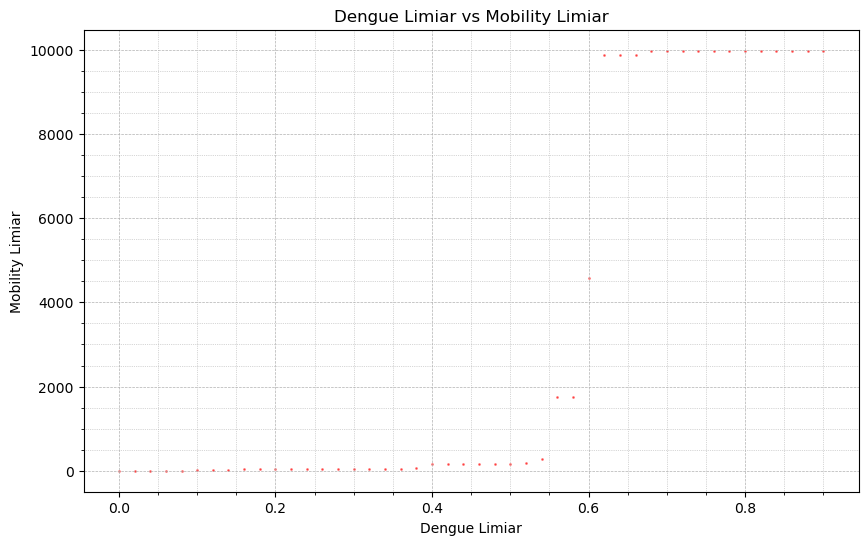

In [13]:
x_values = [triple[0] for triple in filtered_triples]
y_values = [triple[1] for triple in filtered_triples]

plt.figure(figsize=(10, 6))
plt.scatter(y_values, x_values, color='red', alpha=0.5, s=1)

plt.ylabel('Mobility Limiar')
plt.xlabel('Dengue Limiar')
plt.title('Dengue Limiar vs Mobility Limiar')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()  # Ativa os menores ticks
plt.grid(True, which='minor', linestyle=':', linewidth=0.5)  # Estilo para os menores ticks

plt.show()

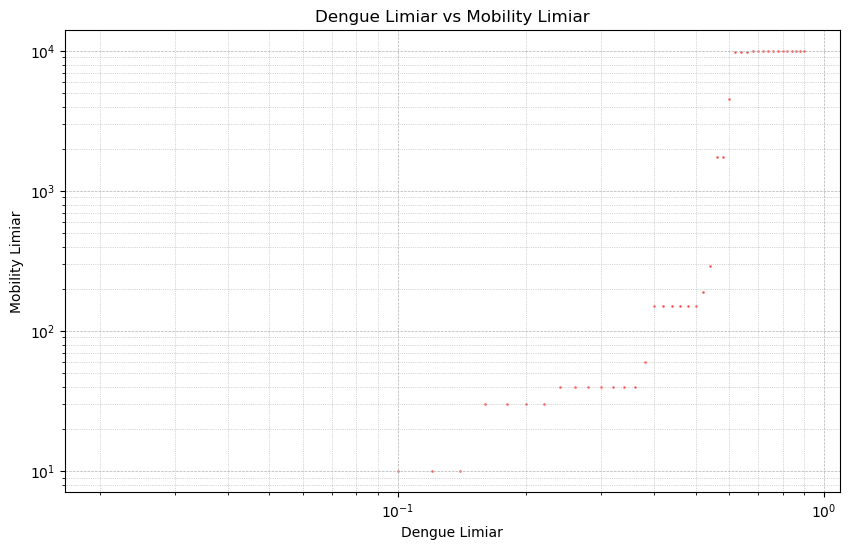

In [14]:
x_values = [triple[0] for triple in filtered_triples]
y_values = [triple[1] for triple in filtered_triples]

plt.figure(figsize=(10, 6))
plt.scatter(y_values, x_values, color='red', alpha=0.5, s=1)
plt.ylabel('Mobility Limiar')
plt.xlabel('Dengue Limiar')
plt.title('Dengue Limiar vs Mobility Limiar')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5) 

plt.xscale('log')
plt.yscale('log')
plt.show()